In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
Airlines = pd.read_excel('C:/Users/dell/Documents/EastWestAirlines.xlsx',sheet_name = 'data')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
Airlines.shape

(3999, 12)

In [5]:
#summary of the data
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
# Renaming column
Airlines = Airlines.rename(columns={"ID#":'ID','Award?' :'Award'})

In [8]:
#not going to falloe EDA step here since it is already done in link1.
#as we know ID & award will not make much contribution during clustering we will drop both column.
Airlines1 = Airlines.drop(['ID','Award'], axis=1)
Airlines.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [10]:
from sklearn.preprocessing import StandardScaler

std_Airlines = StandardScaler().fit_transform(Airlines1)
#this will used for kmeans
std_Airlines.shape

(3999, 10)

In [21]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_Airlines= pca_std.fit_transform(std_Airlines)

In [22]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [23]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [24]:
# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

In [29]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(std_Airlines)

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [30]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [31]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


In [43]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,)
    cluster_labels1 = clusterer1.fit_predict(pca_std_Airlines)
    sil_score1= silhouette_score(pca_std_Airlines, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.36397881678961613
For n_clusters = 3 The average silhouette_score is : 0.3393430103388873
For n_clusters = 4 The average silhouette_score is : 0.33733473583817913
For n_clusters = 5 The average silhouette_score is : 0.3540647225479174
For n_clusters = 6 The average silhouette_score is : 0.3661003712682478
For n_clusters = 7 The average silhouette_score is : 0.2681012816877116
For n_clusters = 8 The average silhouette_score is : 0.28310928094594295
For n_clusters = 9 The average silhouette_score is : 0.289629283097879


model3


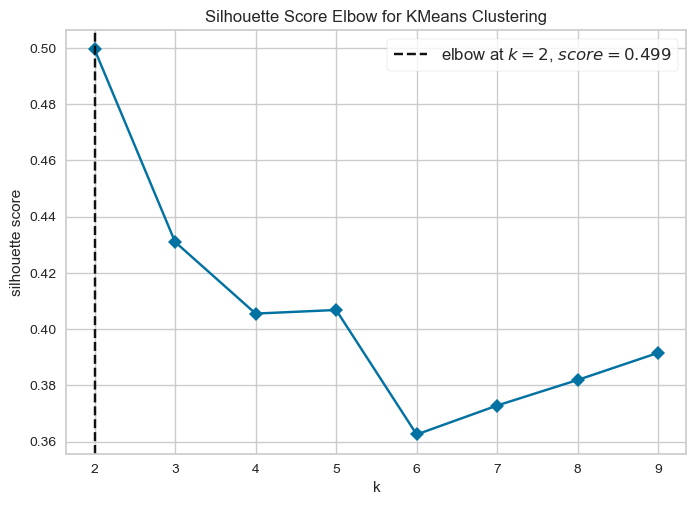

model4


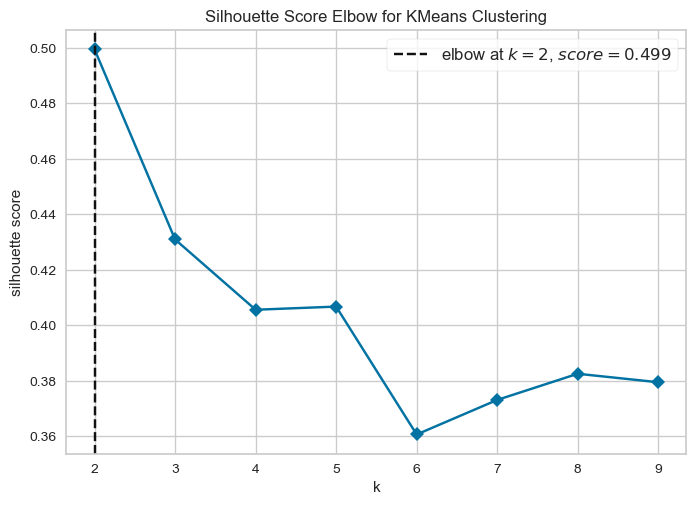

In [44]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model3 = KMeans(random_state=0,)
model4 = KMeans(random_state=10, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=(2,10), metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model3')
visualizer3.fit(pca_minmax_df)    
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(pca_minmax_df)    
visualizer4.poof()
plt.show()

In [46]:
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=6, random_state=0)
y_predict1 = model1.fit_predict(pca_std_Airlines)
y_predict1.shape

(3999,)

In [47]:
y_predict1

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[-1.04566981e+00,  2.62893297e-01, -1.69236338e-02,
        -8.59157738e-02, -5.22349728e-02,  1.43189598e-01,
         5.52394408e-02,  1.38895703e-03],
       [ 1.39019974e+00, -1.00482408e+00, -7.60909828e-02,
         9.41955488e-02, -2.55784255e-01, -2.51248701e-01,
        -6.86126999e-02, -1.83908027e-02],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01],
       [ 4.22422340e+00,  4.07622197e+00,  1.37463788e-01,
        -2.04191722e-01, -6.13873290e-01,  5.13427680e-01,
        -4.97945201e-02,  1.19765871e-01],
       [ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02]])

In [50]:

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

16718.299362405694

In [51]:
model1.score(pca_std_Airlines) 

-16718.299362405694

In [52]:
model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 'warn',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

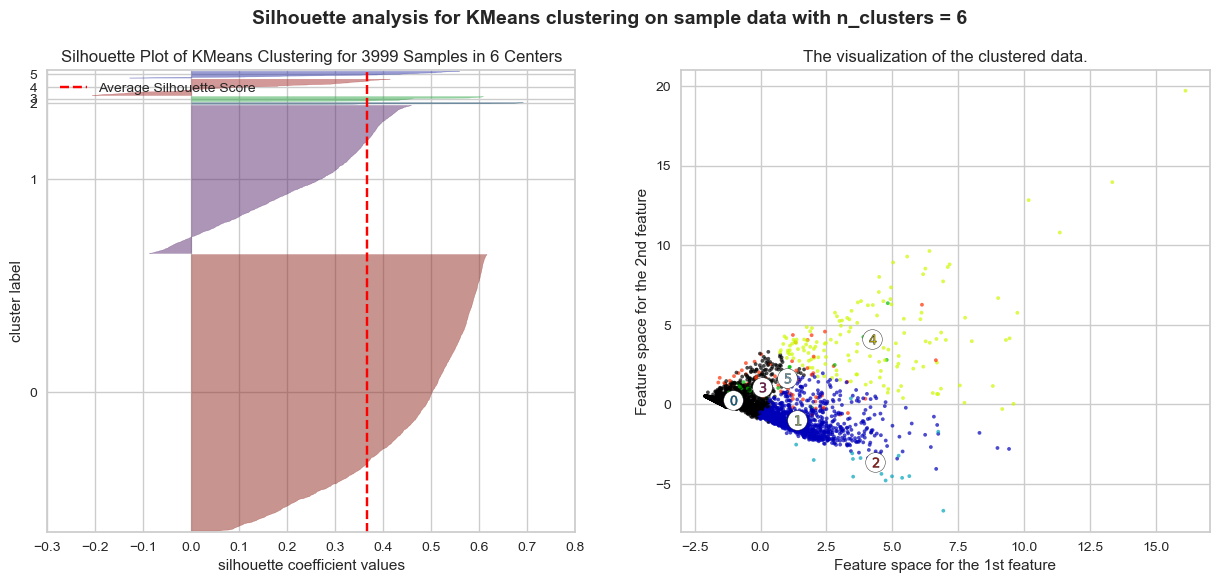

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_Airlines)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_Airlines[:, 0], pca_std_Airlines[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [53]:
# Creating dataframe of cluster lables..

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [57]:
# Concating model1_Cluster df with main dataset copy

Kmeans_Airlines = pd.concat([Airlines.copy(), model1_cluster], axis=1)
Kmeans_Airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


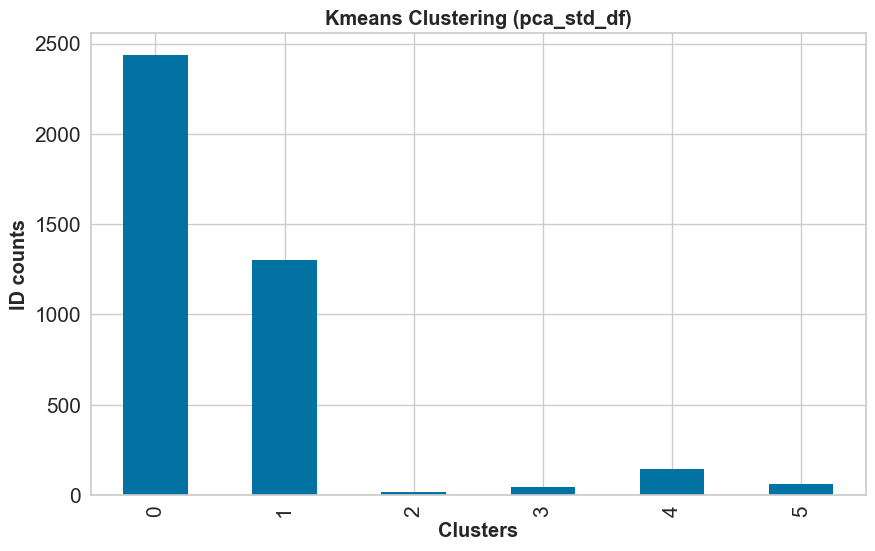

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [60]:
 from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_Airlines)
        silhouette_score1 = silhouette_score(pca_std_Airlines, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.3139605594950552
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8258402005485832
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8258402005485832
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7595573832017464

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3099513555846721
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7965798717740984
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7965798717740984
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7592925058168964

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.32824819737812955
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6569044547102608
For n_clusters = 4 The average silhouette_score with linkage- average : 0.694015492501189
For n

In [61]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_Airlines)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
# Cluster numbers

agg_clustering.n_clusters_

5

In [63]:
# cluster labels for each point

agg_clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
# Number of leaves in the hierarchical tree.

agg_clustering.n_leaves_

3999

In [66]:
# The estimated number of connected components in the graph.

agg_clustering.n_connected_components_


1

In [67]:
# The children of each non-leaf node. Values less than n_samples correspond to leaves of 
#......the tree which are the original samples. A node i greater than or equal to n_samples 
#.........is a non-leaf node and has children children_[i - n_samples]. Alternatively at the 
#...........i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i

agg_clustering.children_

array([[3370, 3876],
       [1826, 2121],
       [2678, 2679],
       ...,
       [7991, 7993],
       [7986, 7994],
       [7988, 7995]])

In [69]:
# Clustering Score

(silhouette_score(pca_std_Airlines, agg_clustering.labels_)*100).round(3)

66.804

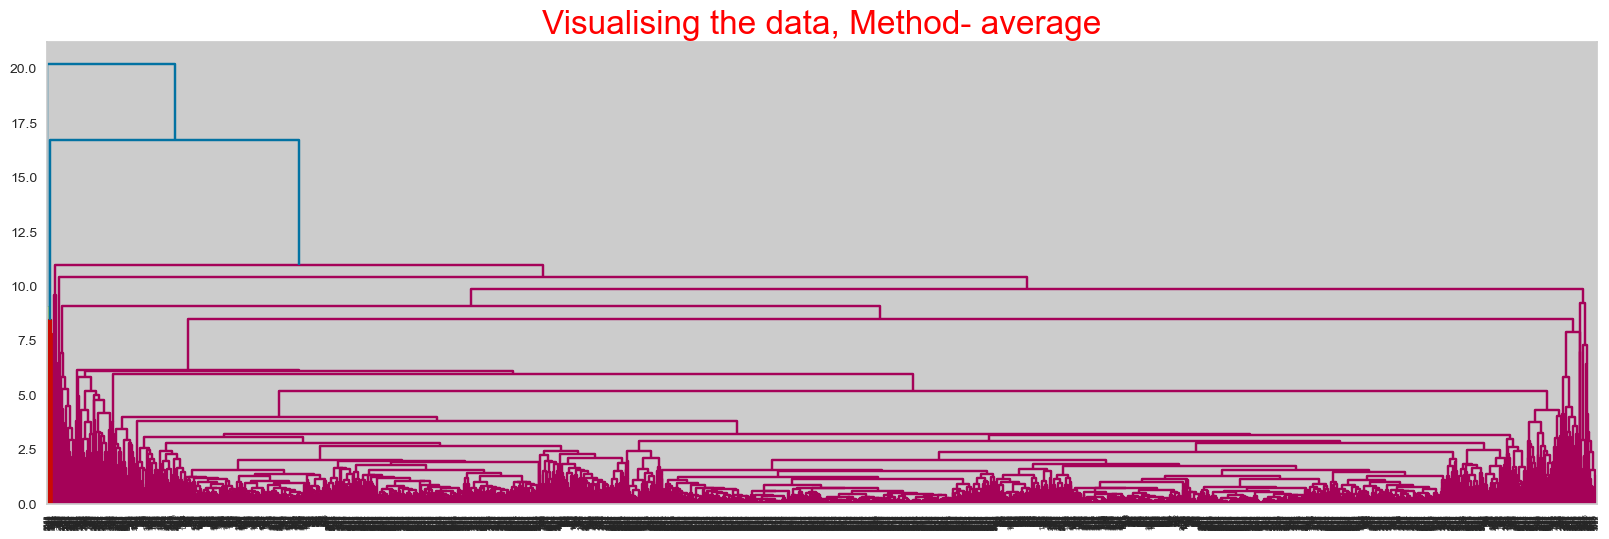

In [72]:
# Plotting Dendrogram.

import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'red'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_Airlines, method = methods,optimal_ordering=False))

In [73]:
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [74]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([Airlines.copy(), hie_cluster], axis=1)
hie_df .head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


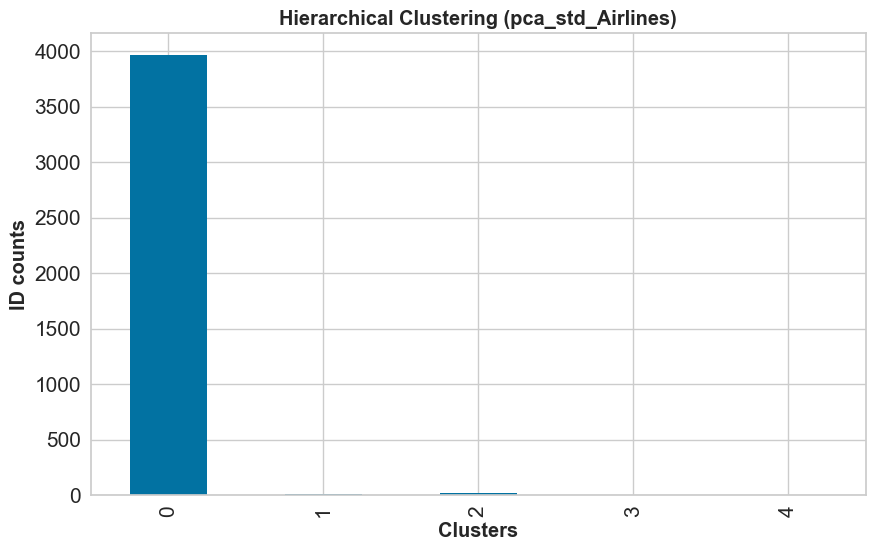

In [75]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_std_Airlines)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [76]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436
1,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
2,15,15,15,15,15,15,15,15,15,15,15,15
3,43,43,43,43,43,43,43,43,43,43,43,43
4,143,143,143,143,143,143,143,143,143,143,143,143
5,59,59,59,59,59,59,59,59,59,59,59,59


In [77]:
hie_df.groupby(['Hie_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Hie_Clustering,,,,,,,,,,,,
0,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965
1,10,10,10,10,10,10,10,10,10,10,10,10
2,15,15,15,15,15,15,15,15,15,15,15,15
3,4,4,4,4,4,4,4,4,4,4,4,4
4,5,5,5,5,5,5,5,5,5,5,5,5


In [78]:
# Groupby Cluster lables

count_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
count_df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436
1,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
2,15,15,15,15,15,15,15,15,15,15,15,15
3,43,43,43,43,43,43,43,43,43,43,43,43
4,143,143,143,143,143,143,143,143,143,143,143,143
5,59,59,59,59,59,59,59,59,59,59,59,59


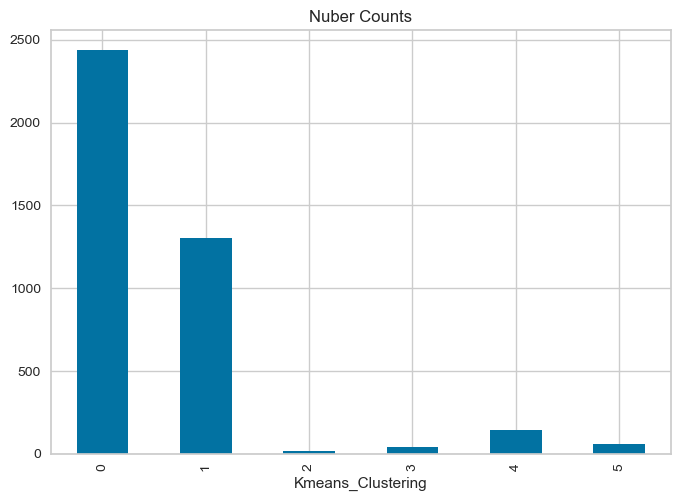

In [79]:
# Total numbers in each cluster..

count = count_df.xs('ID' ,axis = 1)
count.plot(kind='bar', title= 'Nuber Counts')
plt.show()

In [80]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster5_avg'])

In [81]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg,Cluster4_avg,Cluster5_avg
ID,2233.239737,1629.828089,1664.866667,2269.372093,1722.755245
Balance,42323.746305,116923.904068,138061.400000,68876.581395,188282.216783
Qual_miles,49.486864,50.556408,78.800000,23.255814,464.573427
cc1_miles,1.183498,3.692249,3.466667,1.139535,2.244755
cc2_miles,1.000000,1.000000,1.000000,2.348837,1.000000
cc3_miles,1.000411,1.001535,4.066667,1.000000,1.000000
Bonus_miles,4244.377668,38642.166539,93927.866667,14689.837209,32916.748252
Bonus_trans,6.560345,18.808903,28.066667,17.534884,28.013986
Flight_miles_12mo,209.229885,324.110514,506.666667,582.627907,5721.174825
Flight_trans_12,0.639573,0.973906,1.600000,2.209302,16.622378


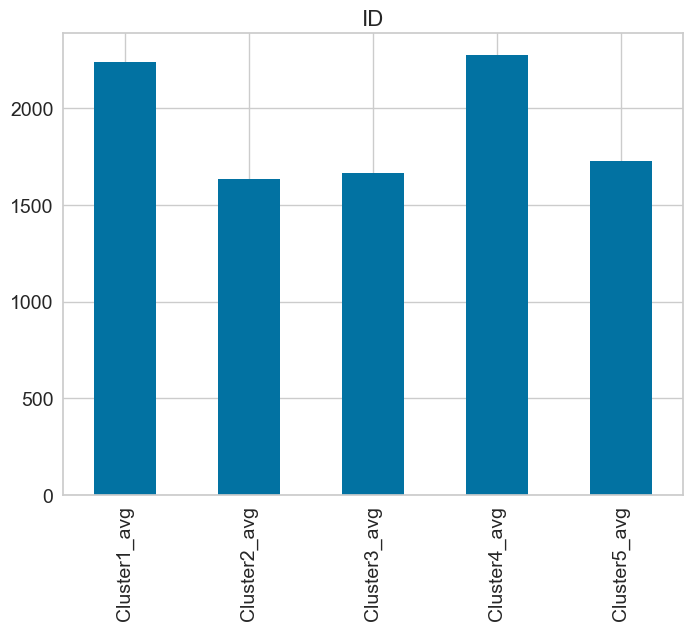

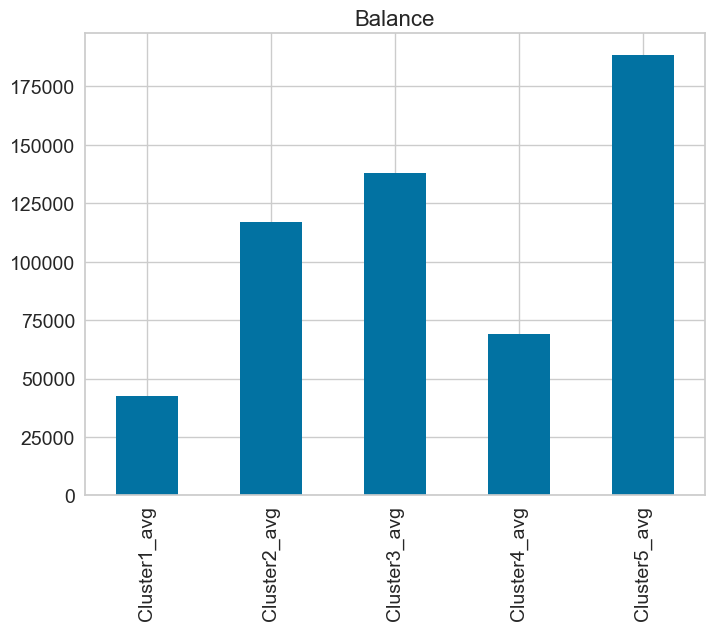

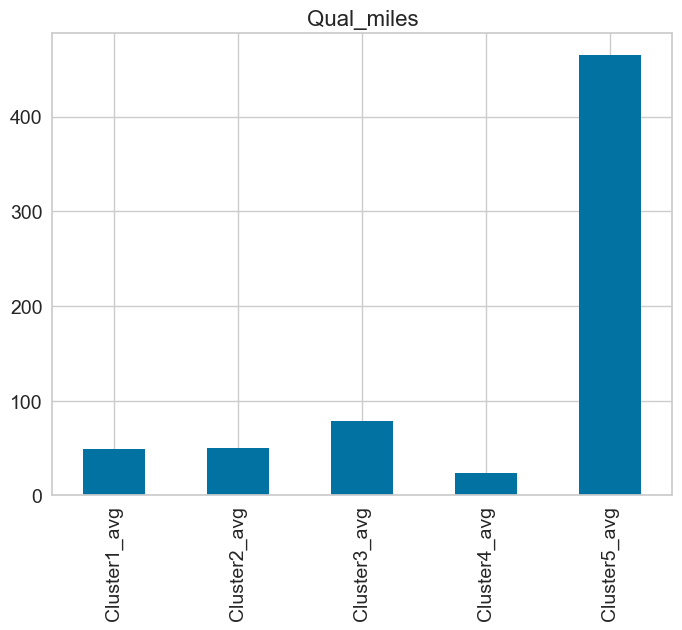

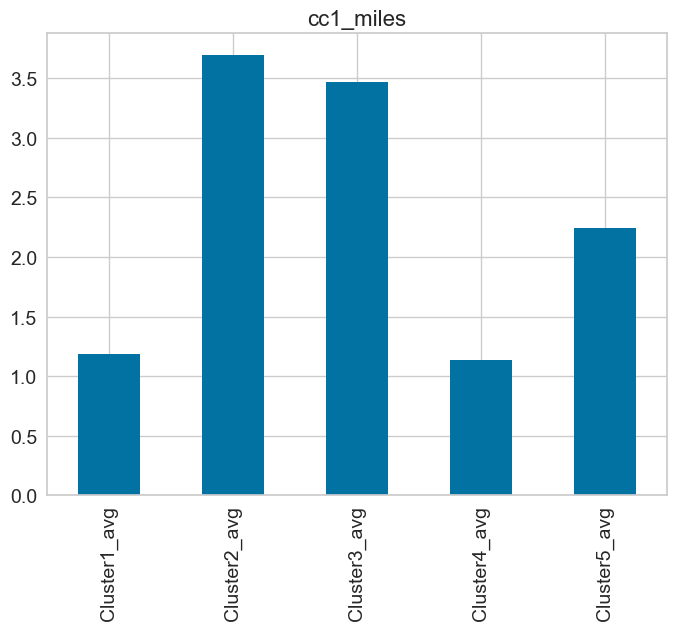

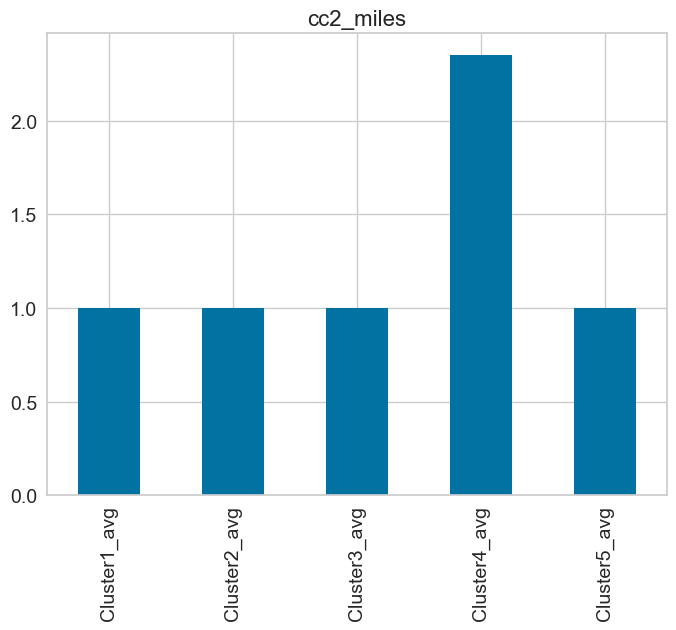

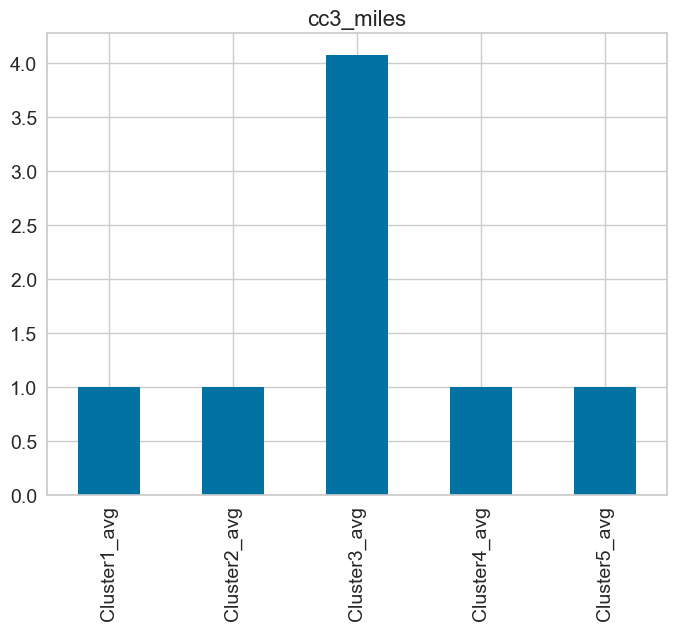

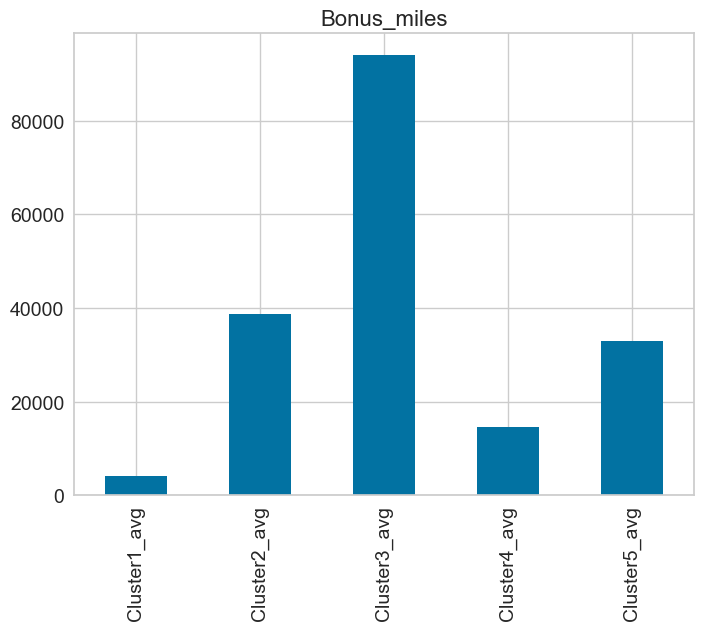

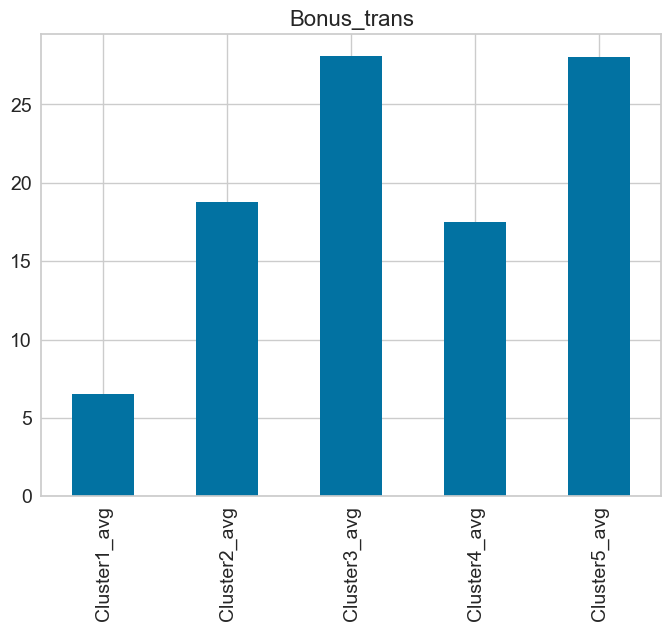

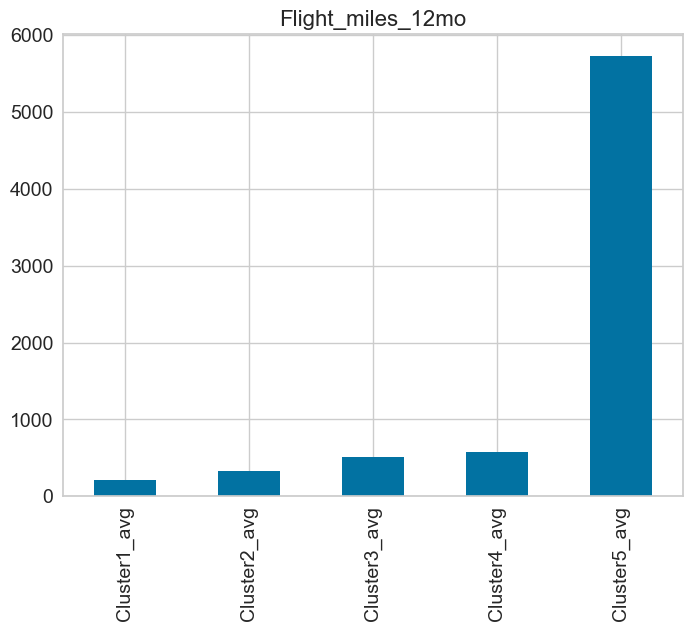

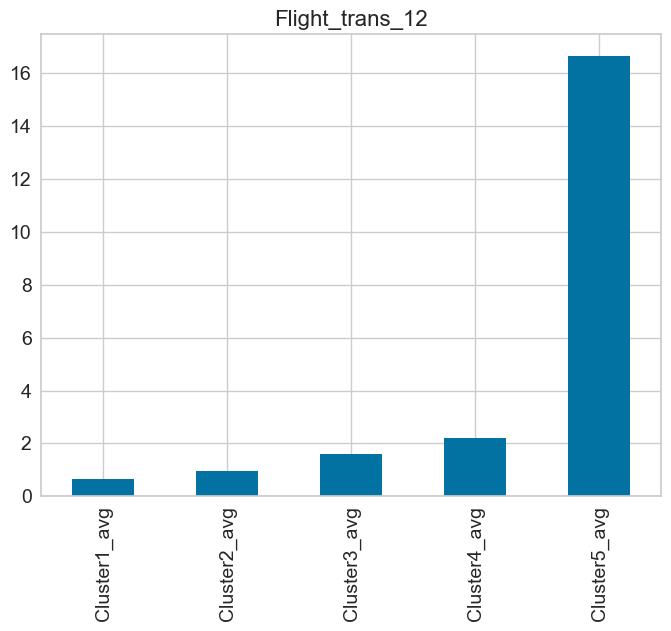

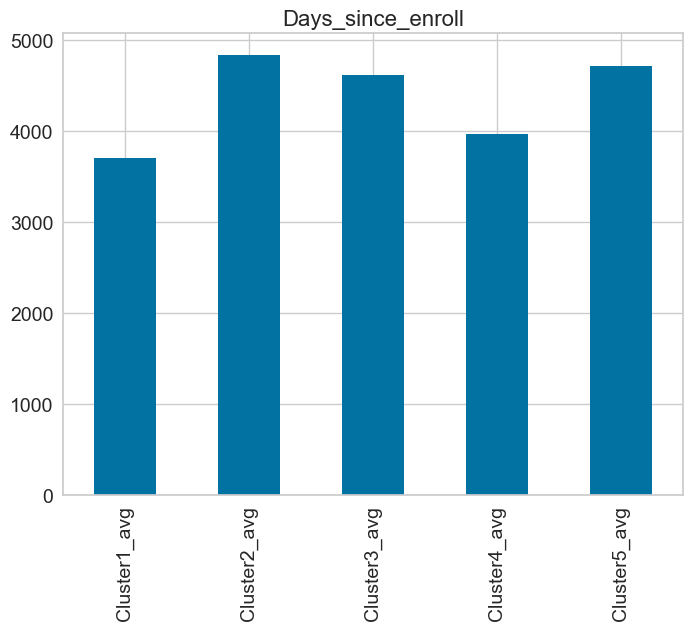

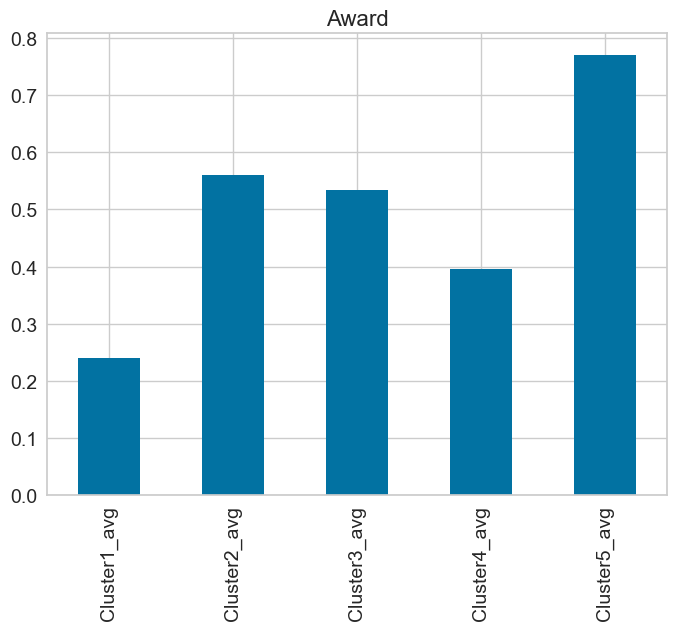

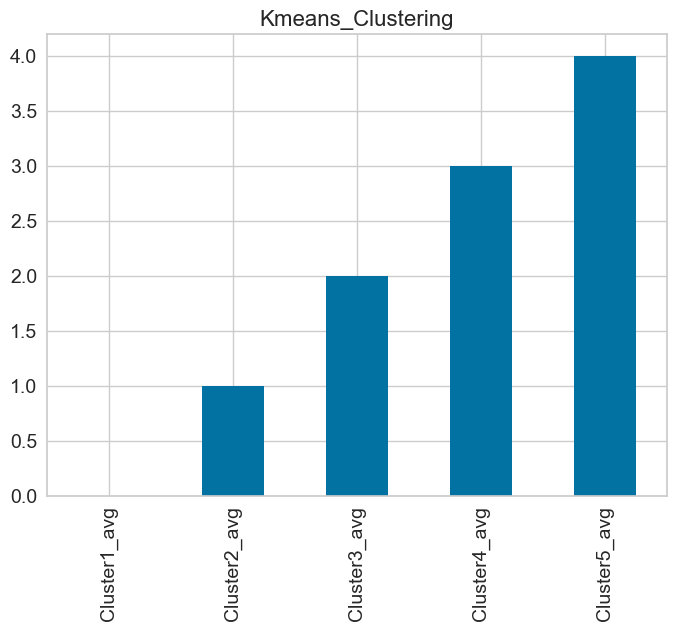

In [82]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

In [ ]:
I have applied EDA to analyze dataset.Discovered correlation between diff variables and found no colinearity.
Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
I have used & analyzed two clustering techniques here..i) KMeans & ii) Hierarchical Clusterig.

By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the MinMaxScalr found less score so not used for further model building.

KMeans clustering is sensitive to outliers.Since produced min. sil. score. whereas hierarchical gives max. in this case.
Hierarchical clustering given total cluster number=5, but when i comapred both kmean & Hierarchical clustering, the hierarchical clustering contains approx 99% data in cluster 1 only. So this will not useful to analyze diff. customer. So i continued with KMeans.